In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# === Configuration ===
IMG_SIZE = (128, 128)
BATCH = 32
EPOCHS = 10
train_dir = r'Train_n_Test/TRAIN'  # Folder with subfolders of rice types


In [3]:
# === Data Generator ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [4]:
# === Load Training and Validation Data ===
train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    subset='validation'
)

Found 18000 images belonging to 20 classes.
Found 4500 images belonging to 20 classes.


In [5]:
# === Model Architecture ===
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE + (3,)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')  # Output layer
])

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# === Compile Model ===
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# === Train Model ===
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 275s 484ms/step - accuracy: 0.3122 - loss: 2.1417 - val_accuracy: 0.5818 - val_loss: 1.1885
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 266s 473ms/step - accuracy: 0.6700 - loss: 0.9637 - val_accuracy: 0.6971 - val_loss: 0.8882
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 273s 485ms/step - accuracy: 0.7602 - loss: 0.7122 - val_accuracy: 0.6273 - val_loss: 1.1146
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 269s 477ms/step - accuracy: 0.8043 - loss: 0.5730 - val_accuracy: 0.7093 - val_loss: 0.8424
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 258s 458ms/step - accuracy: 0.8288 - loss: 0.4919 - val_accuracy: 0.7378 - val_loss: 0.7765
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 265s 470ms/step - accuracy: 0.8467 - loss: 0.4442 - val_accuracy: 0.7369 - val_loss: 0.8302
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 253s 449ms/step - accuracy: 0.8682 - loss: 0.3809 - val_accuracy: 0.7467 - val_loss: 0.7705
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 245s 435ms/step - accuracy: 0.8762 -

In [8]:
# === Save Model ===
model_path = 'rice_cnn_model.h5'
model.save(model_path)

print(f"✅ Model training complete. Saved as: {model_path}")

✅ Model training complete. Saved as: rice_cnn_model.h5


In [9]:
print(train_gen.class_indices)

{'10_Lal_Aush': 0, '11_Jirashail': 1, '12_Gutisharna': 2, '13_Red_Cargo': 3, '14_Najirshail': 4, '15_Katari_Polao': 5, '16_Lal_Biroi': 6, '17_Chinigura_Polao': 7, '18_Amon': 8, '19_Shorna5': 9, '1_Subol_Lota': 10, '20_Lal_Binni': 11, '2_Bashmoti': 12, '3_Ganjiya': 13, '4_Shampakatari': 14, '5_Katarivog': 15, '6_BR28': 16, '7_BR29': 17, '8_Paijam': 18, '9_Bashful': 19}


c:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


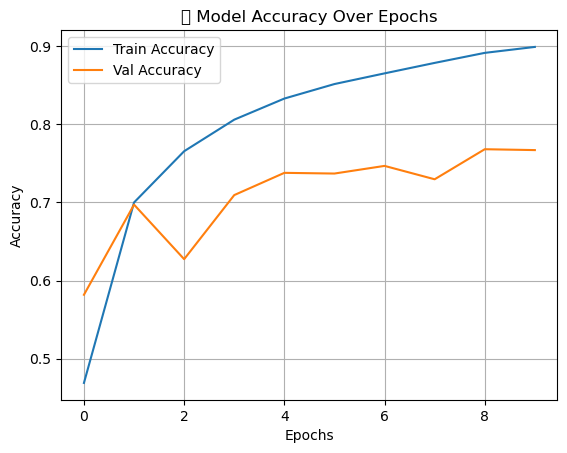

In [10]:
# Plot training vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('📈 Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
pip install tensorflow

In [13]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

# === Load the trained model ===
model = load_model("rice_cnn_model.h5")

# === Class labels ===
# NOTE: Update these labels based on your training folder names
class_names = ['Basmati', 'Jasmine', 'Arborio', 'BlackRice', 'BrownRice']  # example names

# === Set title ===
st.title("🍚 Rice Variety Classifier")
st.write("Upload a rice grain image and let the model predict the variety!")

# === Upload image ===
uploaded_file = st.file_uploader("Choose a rice image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Show image
    image = Image.open(uploaded_file).convert('RGB')
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    img = image.resize((128, 128))  # Must match training size
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Show result
    st.success(f"✅ Predicted Rice Type: **{predicted_class}**")
    st.info(f"🧠 Confidence: **{confidence:.2f}%**")


2025-07-10 15:04:56.660 
  command:

    streamlit run C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv("rice_types_unique_detailed.csv")

# View the first few rows
df.head()

,Rice Name,Scientific Name,Also Known As,Storage Advice,Competing Varieties,Cultivation & Growth,Soil,Nutritional Benefits,Plant Height,Structure of Rice,...,Harvesting,Time Taken,Region,Protein (g),Fat (g),Iron (mg),Pest Resistant,Disease Resistance Level,Market Price (Rs/kg),Demand Level
0,SubolLota,Oryza sativa cv. 'Subol Lota',Subol Lota,Avoid moisture and sunlight,Gutisharna,High yield with irrigation,Alluvial,High iron content,113 cm,Long grain,...,October,122 days,Punjab,6.2,0.7,2.0,Low,Medium,87,Medium
1,Bashmoti,Oryza sativa cv. 'Bashmoti',Bashmoti,Keep in airtight containers,BR28,High yield with irrigation,Loamy,High iron content,101 cm,Short grain,...,November,128 days,Bangladesh,6.3,0.5,2.0,High,Medium,75,Very High
2,Ganjiya,Oryza sativa cv. 'Ganjiya',Ganjiya,Avoid moisture and sunlight,Shorna5,Drought tolerant,Alluvial,Low glycemic index,123 cm,Medium grain,...,November,122 days,West Bengal,7.1,0.6,1.4,High,Medium,110,Low
3,Shampakatari,Oryza sativa cv. 'Shampakatari',Shampakatari,Keep in airtight containers,Bashful,Flood resistant,Silty,Good source of protein,107 cm,Medium grain,...,October-November,111 days,Chhattisgarh,6.1,0.6,2.3,Low,Low,117,High
4,Katarivog,Oryza sativa cv. 'Katarivog',Katarivog,Keep in airtight containers,BR28,Flood resistant,Fertile,Good source of protein,95 cm,Long grain,...,November,118 days,Odisha,6.3,0.5,2.2,High,Medium,77,High


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rice Name                 20 non-null     object 
 1   Scientific Name           20 non-null     object 
 2   Also Known As             20 non-null     object 
 3   Storage Advice            20 non-null     object 
 4   Competing Varieties       20 non-null     object 
 5   Cultivation & Growth      20 non-null     object 
 6   Soil                      20 non-null     object 
 7   Nutritional Benefits      20 non-null     object 
 8   Plant Height              20 non-null     object 
 9   Structure of Rice         20 non-null     object 
 10  Falling with Grain        20 non-null     object 
 11  Color                     20 non-null     object 
 12  Aroma                     18 non-null     object 
 13  Genetic Diversity         20 non-null     object 
 14  Global Produ

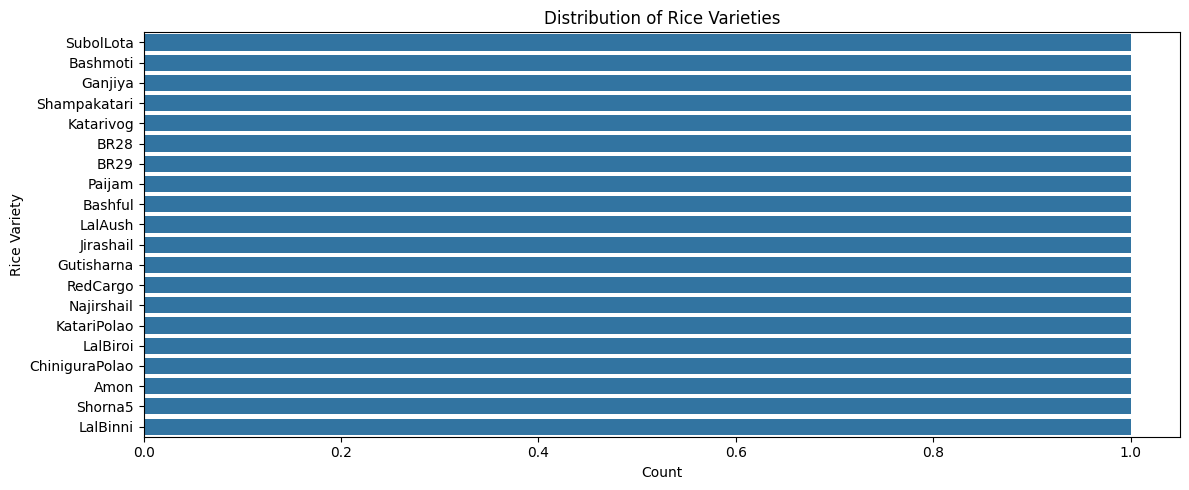

In [6]:
# Check data types and nulls
df.info()

# Check missing values
df.isnull().sum()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(y='Rice Name', data=df, order=df['Rice Name'].value_counts().index)
plt.title("Distribution of Rice Varieties")
plt.xlabel("Count")
plt.ylabel("Rice Variety")
plt.tight_layout()
plt.show()

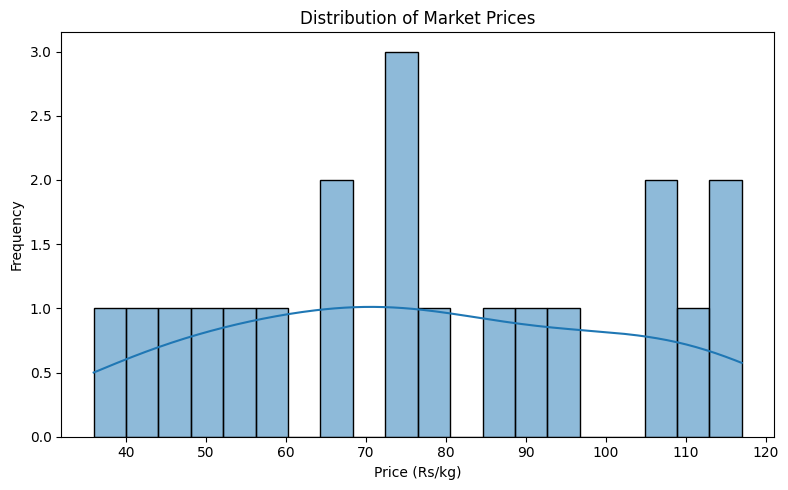

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Market Price (Rs/kg)'], bins=20, kde=True)
plt.title("Distribution of Market Prices")
plt.xlabel("Price (Rs/kg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

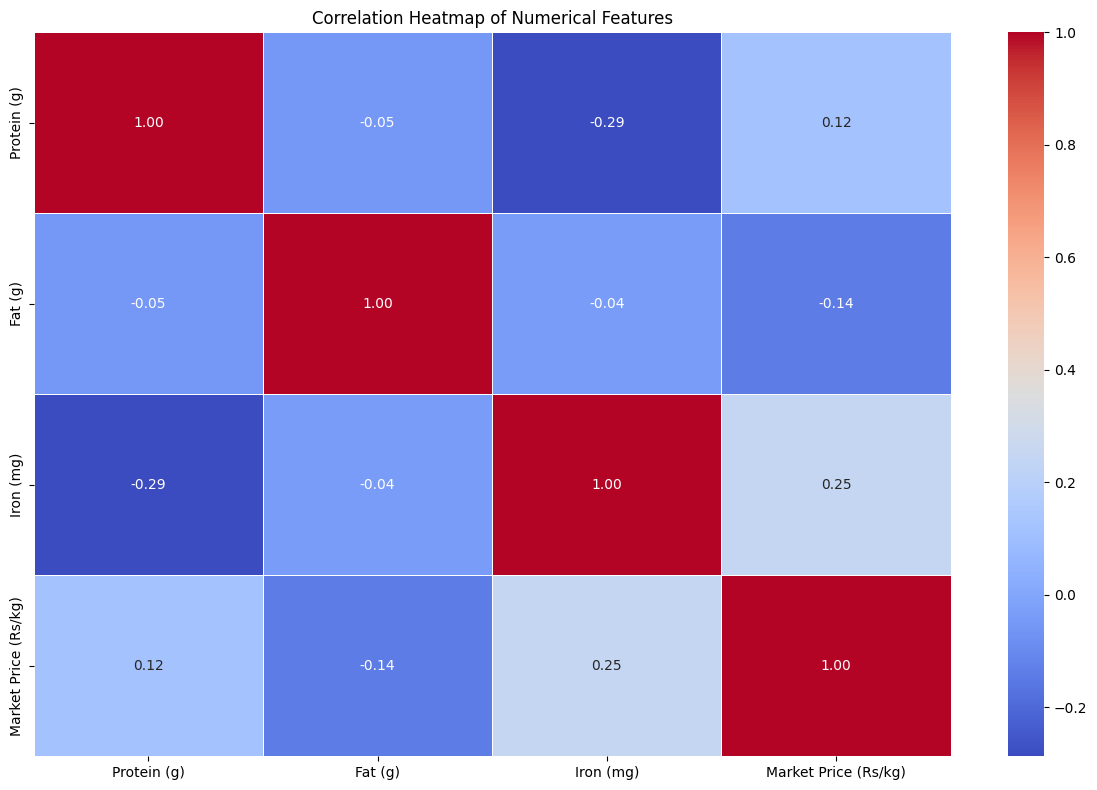

In [8]:







# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()




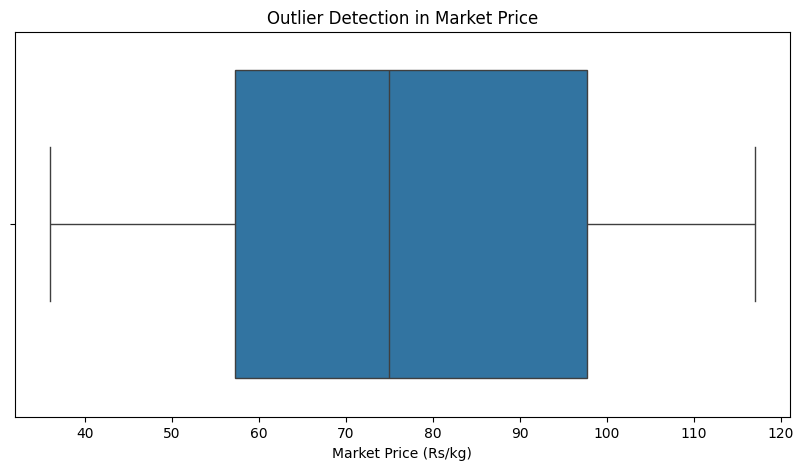

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Market Price (Rs/kg)'])
plt.title("Outlier Detection in Market Price")
plt.show()

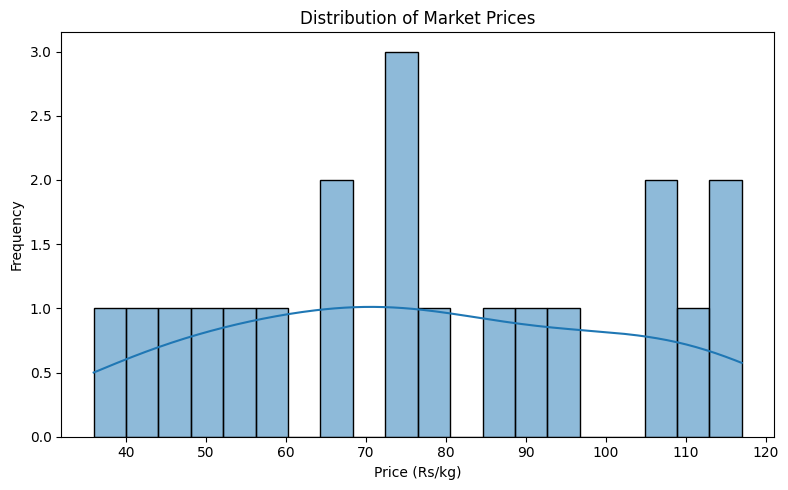

In [10]:

plt.figure(figsize=(8, 5))
sns.histplot(df['Market Price (Rs/kg)'], bins=20, kde=True)
plt.title("Distribution of Market Prices")
plt.xlabel("Price (Rs/kg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

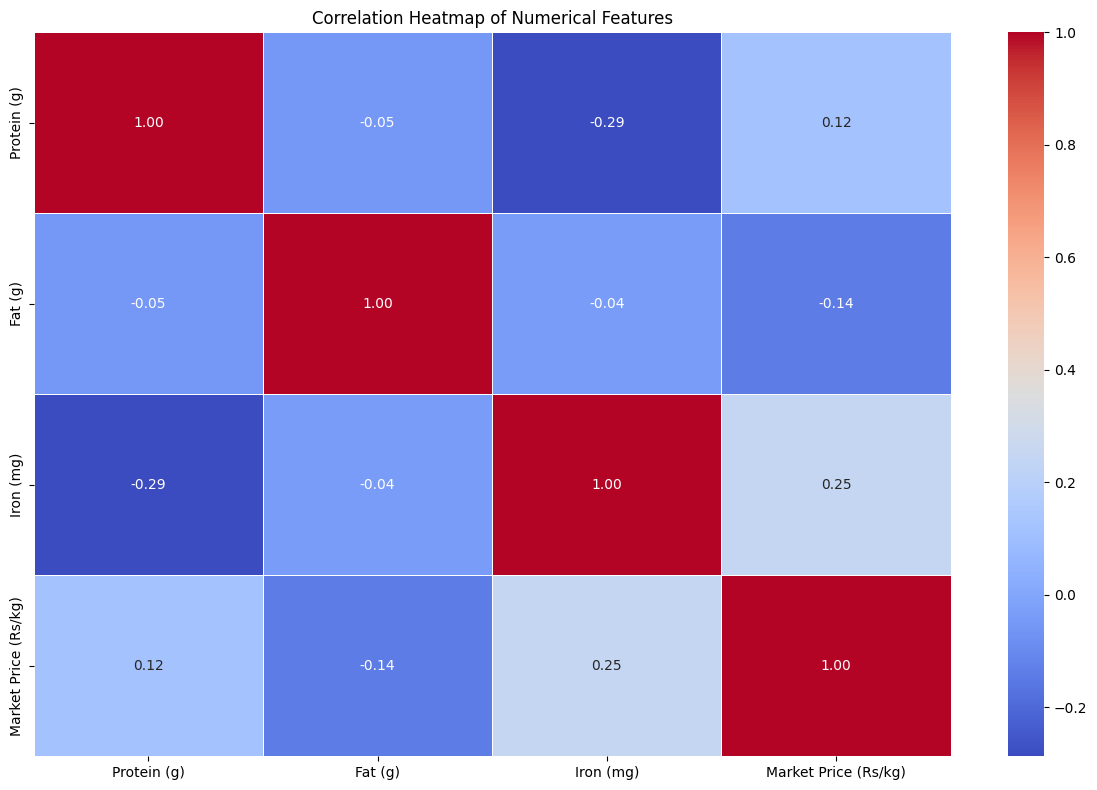

In [11]:

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()